# Linear Regression

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Okuns_law_quarterly_differences.svg/1280px-Okuns_law_quarterly_differences.svg.png" width = "400">

- Galton (1866): Regression towards Mediocrity in Hereditary Stature.
- Let $n$ be the number of samples $(X_i, Y_i)$ where $i = 1, \ldots, n$.
- The linear model states below:
$$Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,$$ 
where (1) $X_i$ is the explanatory variable (2) $Y_i$ is the explained variable.
- We apply the following assumptions to the linear model:
    1. $X_i$ and $Y_i$ are linearly depedent.
    2. $\mathbf{E}(\varepsilon_i) = 0.$
    3. Homoscedasticity: $\mathbf{Var}(\varepsilon_i) = \sigma^2$ for $i = 0, 1, \ldots, n.$
    4. Serial independence: $\mathbf{E}(\varepsilon_i\varepsilon_j) = 0$ for all $i \neq j.$
    5. Normality assumption: $\varepsilon_i \sim N(0, \sigma^2).$
    6. Lack of perfect multicollinearity in the predictors.
- So that we can say $$Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma^2).$$
- Now we use $$Y_i = \hat\beta_0 + \hat\beta_1 X_i$$ to estimate $$Y_i = \beta_0 + \beta_1 X_i$$
- You could estimate $\beta_0$ and $\beta_1$ by using

    1. **method of least squares**, 
    2. **method of maximum likelihood estimation (MLE)**,
    3. **method of moments (MoM)**.
- For multivariate linear regression with $k$ explanatory variables, $\beta^T = [\beta_0, \beta_1, \ldots, \beta_k]$ and $X$ becomes a $n \times k$ matrix.
- To demonstrate the method of least squares, we formulate the set of linear equations by **normal form**, that is,

$$X^T y = X^T X \beta,$$

where $X$ is the coefficient matrix of linear equations, $y$ be the response vector, and $\beta$ is the vector of unknowns.

- Then we can have $$\beta = (X^TX)^{-1}X^T y.$$
    - See https://www.youtube.com/watch?v=Zu-UlcfPPUk.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/OLS_geometric_interpretation.svg/1280px-OLS_geometric_interpretation.svg.png" width = "400">

- References
    - Chung-Ming Kuan: https://www.csie.ntu.edu.tw/~d00922011/python/slides/QA-Slide_Lec-1_20200225.pdf
    - https://en.wikipedia.org/wiki/Linear_regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'lines.linewidth': 2}
plt.rcParams.update(params)

%matplotlib inline

## Example 1: Polynomials
- Now we consider $y = 1 + 0.1x + 10x^2.$
- To demonstrate how the linear regresson model works, we add some white noises to the equation.

In [2]:
# Sample size
nsample = 100

# Data generation
x = np.linspace(0, 1, nsample)
beta = np.array([1, 0.1, 10]).T

X = np.column_stack((x, x ** 2))
X = sm.add_constant(X) # Add an intercept.
y_true = np.dot(X, beta)

print(y_true)

[ 1.          1.00203041  1.00610142  1.01221304  1.02036527  1.03055811
  1.04279155  1.05706561  1.07338027  1.09173554  1.11213142  1.1345679
  1.159045    1.1855627   1.21412101  1.24471993  1.27735945  1.31203959
  1.34876033  1.38752168  1.42832364  1.47116621  1.51604938  1.56297317
  1.61193756  1.66294256  1.71598816  1.77107438  1.8282012   1.88736864
  1.94857668  2.01182532  2.07711458  2.14444444  2.21381492  2.285226
  2.35867769  2.43416998  2.51170289  2.5912764   2.67289052  2.75654525
  2.84224059  2.92997653  3.01975309  3.11157025  3.20542802  3.3013264
  3.39926538  3.49924498  3.60126518  3.70532599  3.81142741  3.91956943
  4.02975207  4.14197531  4.25623916  4.37254362  4.49088868  4.61127436
  4.73370064  4.85816753  4.98467503  5.11322314  5.24381186  5.37644118
  5.51111111  5.64782165  5.7865728   5.92736455  6.07019692  6.21506989
  6.36198347  6.51093766  6.66193246  6.81496786  6.97004387  7.12716049
  7.28631772  7.44751556  7.610754    7.77603306  7.943

In [3]:
e = np.random.normal(size = nsample)
y = y_true + e

Text(0.5, 0, 'y')

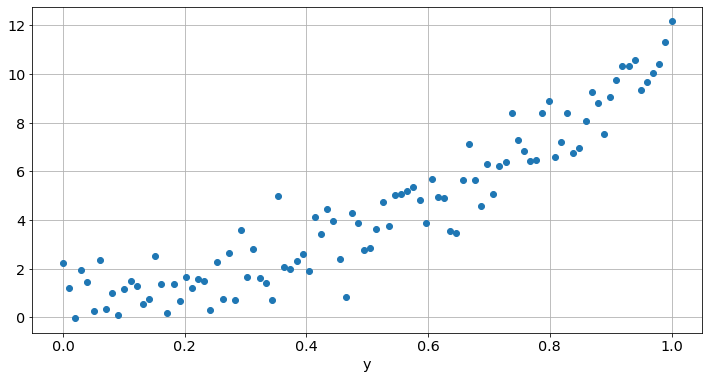

In [4]:
plt.figure(figsize = (12, 6))
plt.plot(x, y, "o")
plt.grid(True)
plt.xlabel("x")
plt.xlabel("y")

In [5]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     539.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.82e-53
Time:                        18:13:29   Log-Likelihood:                -132.32
No. Observations:                 100   AIC:                             270.6
Df Residuals:                      97   BIC:                             278.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9960      0.271      3.671      0.0

### Summary of Statistics in First Row
- **Coefficients of determination** ($R^2$ and adjusted $R^2$ statistic): one of goodness of fitness (GoF). [link](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- **F-statistic**
    - $H_0$: all the regression coefficients are equal to 0 (except the coefficient on the intercept).
- **Log-Likelihood** [link](https://en.wikipedia.org/wiki/Likelihood_function)
    - Given a parameterized family of probability density functions, $x \longmapsto f(x|\theta)$ where $\theta$ is the parameter, the likelihood function is $\theta \longmapsto L(\theta|x)$ where $x$ is the observed outcome of an experiment.
    - Log-likelihood function is a logarithmic transformation of the likelihood function.
    - For practical purposes it is more convenient to work with the log-likelihood function in maximum likelihood estimation (MLE).
- **Akaike Information Criterion (AIC)** [link](https://en.wikipedia.org/wiki/Akaike_information_criterion)
    - Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.
    - Thus, AIC provides a means for **model selection**.
    - In estimating the amount of information lost by a model, AIC deals with **the trade-off between the goodness of fit of the model and the simplicity of the model**.
    - In other words, **AIC deals with both the risk of overfitting and the risk of underfitting.**
- **Bayesian Information Criterion (BIC)** [link](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
    - Note that the model with the lowest BIC is preferred.
    - The penalty term is larger in BIC than in AIC.


### Summary of Statistics in Middle Row
- **t-test** [link](https://en.wikipedia.org/wiki/Student%27s_t-test): $H_0$ states that the coefficient $\beta_i$ is equal to 0 for some $i$.



### Summary of Statistics in Bottom Row
- **D'Agostino-Pearson Omnibus test** [link](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): when the data is  normally distributed the test statistic $z^2_k + z^2_s$ has a $\chi^2$ distribution with 2 degrees of freedom, that is, $z^2_k + z^2_s \sim \chi^2(2).$
    - This test should generally not be used for data sets with less than 20 elements.
- **Jarque-Bera test** [link](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
    - $H_0$: the data is normally distributed.
    - $H_1$: the data follow some other distribution. 
- **Durbin-Watson test** [link](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)
    - The null hypothesis of the test is that there is no serial correlation
    in the residuals.
- **Condition number** [link](https://en.wikipedia.org/wiki/Condition_number)
    - If the condition number is large, this might indicate that there are strong multicollinearity or other numerical problems.

In [6]:
print('Parameters: ', result.params)
print('R2: ', result.rsquared)

Parameters:  [0.99596063 0.30558786 9.76943392]
R2:  0.9174902876299948


In [7]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(result, alpha = 0.05)

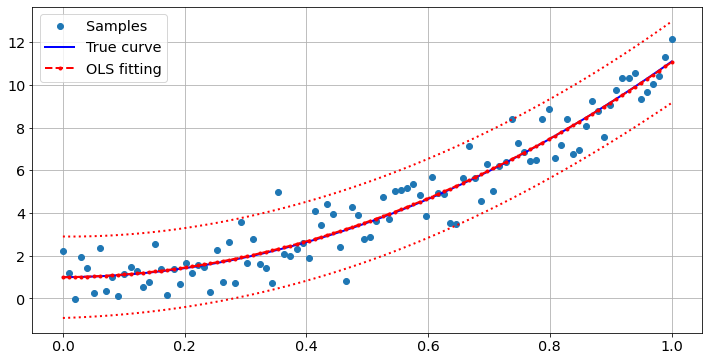

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, result.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_l, 'r:')
ax.plot(x, iv_u, 'r:')
ax.legend(loc = 'best')
ax.grid(True)

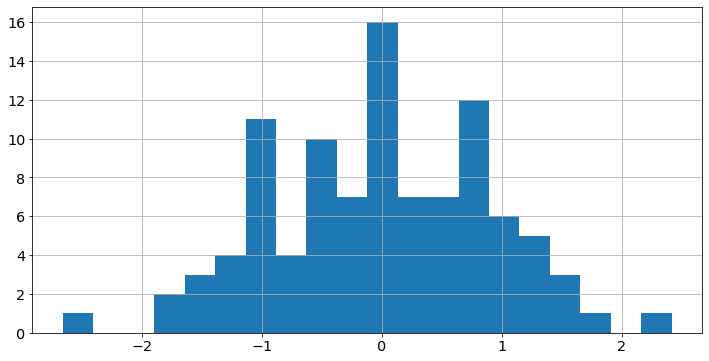

In [9]:
residuals = result.fittedvalues - y # equivalent to result.resid

plt.figure(figsize = (12, 6))
plt.hist(residuals, 20)
plt.grid(True)

In [10]:
import scipy

print(scipy.stats.kstest(residuals, 'norm'))
print(scipy.stats.shapiro(residuals))

KstestResult(statistic=0.05244447524552709, pvalue=0.9325672063362046)
ShapiroResult(statistic=0.9945759773254395, pvalue=0.9626356959342957)


### Exercise 1
- Replace the regression model by $y = \beta_0 + \beta_1 x$.

In [11]:
X2 = sm.add_constant(x)

model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     614.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.44e-44
Time:                        18:13:29   Log-Likelihood:                -157.90
No. Observations:                 100   AIC:                             319.8
Df Residuals:                      98   BIC:                             325.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6158      0.235     -2.617      0.0

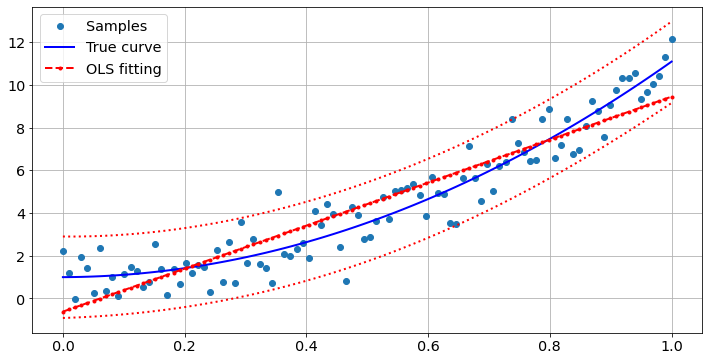

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, result.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_l, 'r:')
ax.plot(x, iv_u, 'r:')
ax.legend(loc = 'best')
ax.grid(True)

### Exercise 2
- Replace the regression model by $y = \beta_0 + \beta_1 x + \beta_2 x ^ 2 + \beta_3 x ^ 3$.

In [13]:
X3 = np.column_stack((x, x ** 2, x ** 3))
X3 = sm.add_constant(X3)

model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     356.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.25e-52
Time:                        18:13:30   Log-Likelihood:                -132.29
No. Observations:                 100   AIC:                             272.6
Df Residuals:                      96   BIC:                             283.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0459      0.357      2.926      0.0

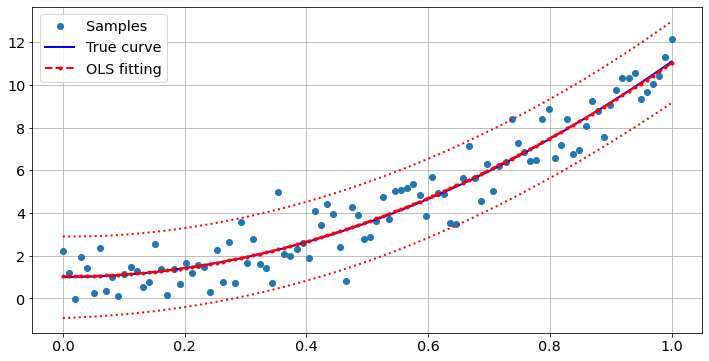

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, result.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_l, 'r:')
ax.plot(x, iv_u, 'r:')
ax.legend(loc = 'best')
ax.grid(True)

## Example 2: OLS Non-linear Curve but Linear in Parameters
- Consider the function $f(x) = 0.5 x + 0.5 \sin(x) - 0.02 (x - 5) ^ 2 + 5.$

In [15]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + np.random.normal(size = nsample)

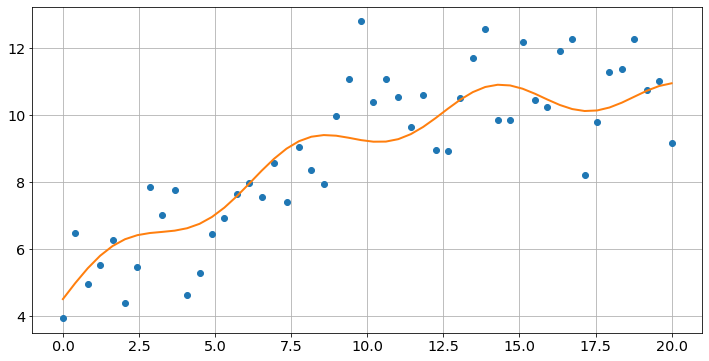

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(x, y, 'o')
plt.plot(x, y_true)
plt.grid(True)

In [17]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     45.83
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.26e-14
Time:                        18:13:30   Log-Likelihood:                -79.449
No. Observations:                  50   AIC:                             166.9
Df Residuals:                      46   BIC:                             174.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5576      0.065      8.584      0.0

In [18]:
print('Parameters: ', res.params)

Parameters:  [ 0.55762926  0.13188179 -0.02286123  4.72238299]


In [19]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(res)

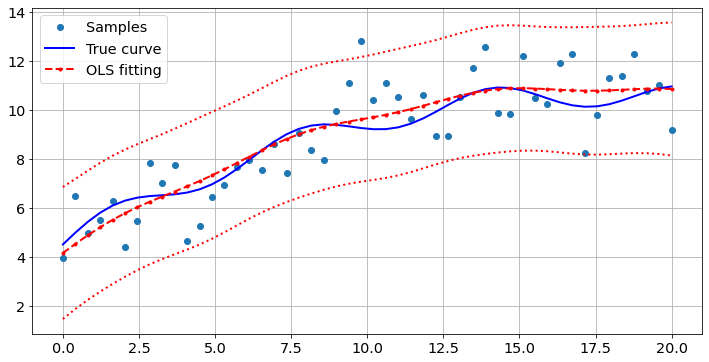

In [20]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, res.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_u, 'r:')
ax.plot(x, iv_l, 'r:')
ax.legend(loc = 'best')
ax.grid(True)

## Example 3: Regression with Categorical Data
- References
    - https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis/

In [21]:
nsample = 50
groups = np.zeros(nsample, dtype = np.int32)
groups[20 : 40] = 1
groups[40 : ] = 2

dummy = pd.get_dummies(groups).values # dummy = (groups[:,None] == np.unique(groups)).astype(float)

In [22]:
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy[ :, 1 : ])) # drop reference category
X = sm.add_constant(X)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size = nsample)
y = y_true + e

In [23]:
print(X[ : 5, :])
print(y[ : 5])
print(groups)
print(dummy[ : -5, : ])

[[1.         0.         0.         0.        ]
 [1.         0.40816327 0.         0.        ]
 [1.         0.81632653 0.         0.        ]
 [1.         1.2244898  0.         0.        ]
 [1.         1.63265306 0.         0.        ]]
[0.19489368 3.33700162 1.95067403 4.15199935 3.79775726]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [24]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6911.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.76e-61
Time:                        18:13:30   Log-Likelihood:                -69.508
No. Observations:                  50   AIC:                             147.0
Df Residuals:                      46   BIC:                             154.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6348      0.342      1.857      0.0

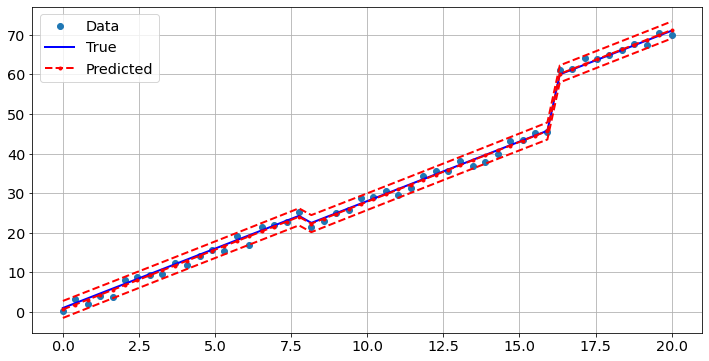

In [25]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, y, 'o', label = "Data")
ax.plot(x, y_true, 'b-', label = "True")
ax.plot(x, res2.fittedvalues, 'r--.', label = "Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc = "best")
ax.grid(True)